<a href="https://colab.research.google.com/github/Mateo289/Teoria_senales/blob/main/Tarea_8_Nov_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

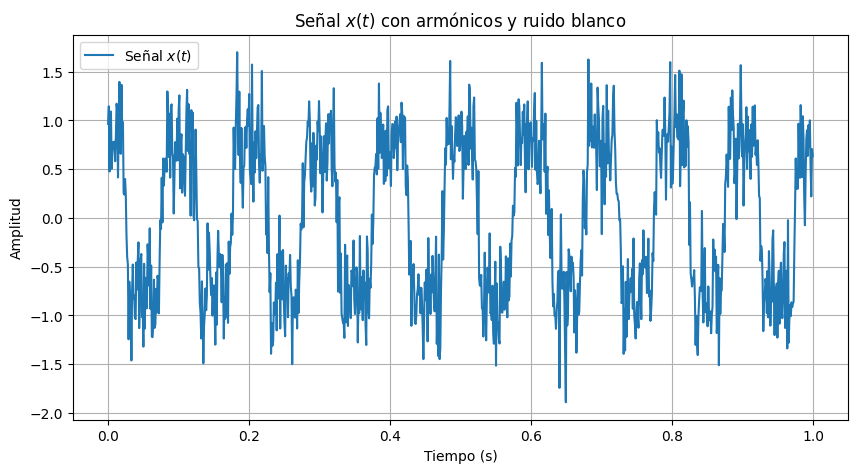

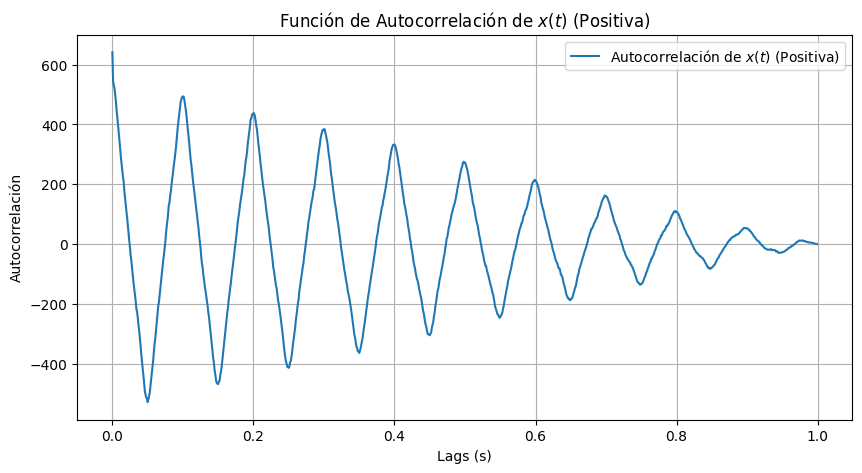

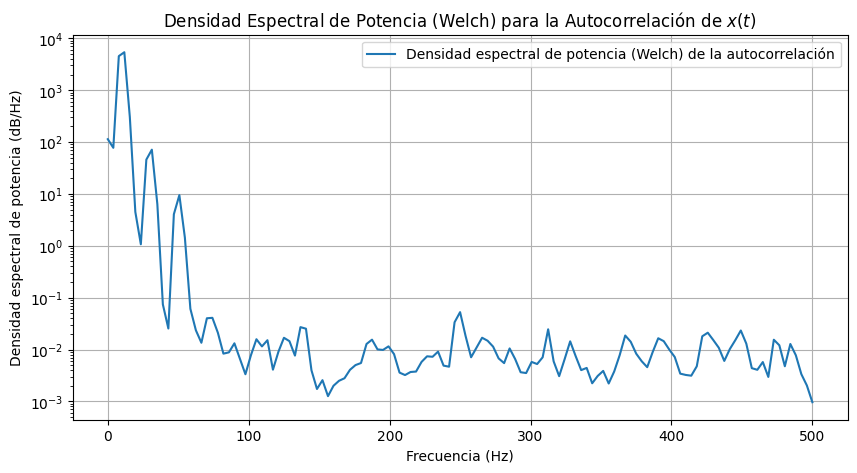

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate, welch

# Parámetros
fs = 1000  # Frecuencia de muestreo en Hz
T = 1      # Duración de la señal en segundos
t = np.linspace(0, T, fs * T, endpoint=False)

# Definir las frecuencias angulares de los armónicos
Wo = 2 * np.pi * 10  # Frecuencia fundamental en radianes por segundo
frecuencias = [Wo, 3*Wo, 5*Wo]  # Frecuencias de los armónicos
pesos = [1, -1/3, 1/5]  # Pesos o coeficientes de los armónicos

# Generar la señal x(t) como la suma de armónicos
signal = np.zeros_like(t)
for i in range(len(frecuencias)):
    signal += pesos[i] * np.cos(frecuencias[i] * t)

# Añadir el ruido blanco gaussiano
ruido = np.random.normal(0, np.sqrt(0.1), len(t))  # Ruido blanco gaussiano con varianza 0.1
x_t = signal + ruido

# Graficar la señal x(t)
plt.figure(figsize=(10, 5))
plt.plot(t, x_t, label="Señal $x(t)$")
plt.title("Señal $x(t)$ con armónicos y ruido blanco")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid()
plt.show()

# Calcular la función de autocorrelación de x(t)
autocorr = correlate(x_t, x_t, mode='full')
lags = np.arange(-len(t) + 1, len(t))

# Solo tomar la parte positiva de la autocorrelación (desde el número cero hacia adelante)
autocorr_pos = autocorr[len(t)-1:]  # Desde el centro hacia adelante
lags_pos = lags[len(t)-1:]  # Lags positivos

# Graficar la función de autocorrelación solo para lags positivos
plt.figure(figsize=(10, 5))
plt.plot(lags_pos / fs, autocorr_pos, label="Autocorrelación de $x(t)$ (Positiva)")
plt.title("Función de Autocorrelación de $x(t)$ (Positiva)")
plt.xlabel("Lags (s)")
plt.ylabel("Autocorrelación")
plt.legend()
plt.grid()
plt.show()

# Aplicar el método de Welch a la autocorrelación positiva
f, Pxx = welch(autocorr_pos, fs, nperseg=256)

# Graficar la densidad espectral de potencia estimada por Welch para la autocorrelación
plt.figure(figsize=(10, 5))
plt.semilogy(f, Pxx, label="Densidad espectral de potencia (Welch) de la autocorrelación")
plt.title("Densidad Espectral de Potencia (Welch) para la Autocorrelación de $x(t)$")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Densidad espectral de potencia (dB/Hz)")
plt.legend()
plt.grid()
plt.show()


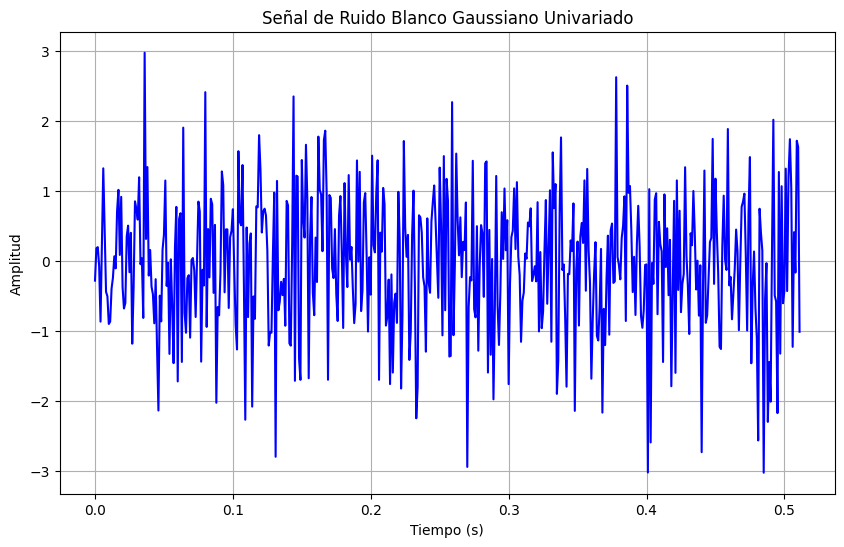

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
signal_length = 512  # Longitud de la señal
fs = 1000  # Frecuencia de muestreo en Hz

# Crear un vector de tiempo t de longitud 512 (1 segundo de duración)
t = np.arange(signal_length) / fs  # Esto crea un vector t de longitud 512

# Generar una señal de ruido blanco gaussiano univariado
signal = np.random.normal(0, 1, signal_length)  # Ruido blanco con media 0 y desviación estándar 1

# Graficar la señal de ruido blanco
plt.figure(figsize=(10, 6))
plt.plot(t, signal, color='blue')
plt.title("Señal de Ruido Blanco Gaussiano Univariado")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()


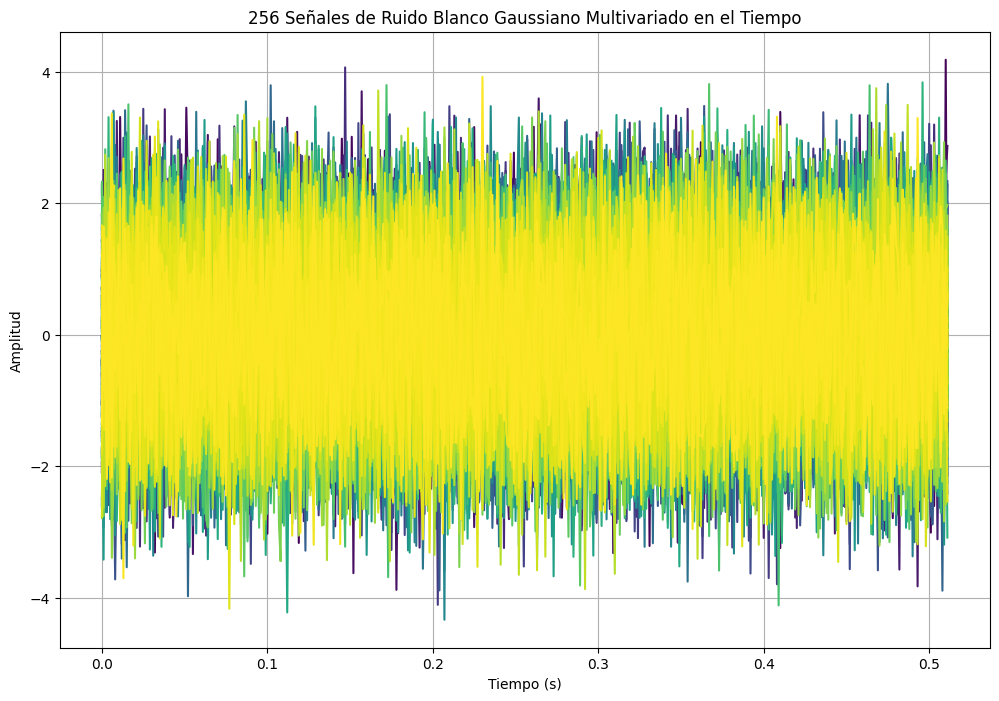

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Parámetros
num_signals = 256  # Número de señales de ruido
signal_length = 512  # Longitud de cada señal
fs = 1000  # Frecuencia de muestreo en Hz

# Crear un vector de tiempo t de longitud 512
t = np.arange(signal_length) / fs  # Esto crea un vector t de longitud 512

# Generar 256 señales de ruido blanco gaussiano diferentes
signals = np.random.normal(0, 1, (num_signals, signal_length))  # 256 señales de ruido

# Crear un mapa de colores
colors = cm.viridis(np.linspace(0, 1, num_signals))  # Utiliza una gama de colores

# Graficar las 256 señales en el tiempo, cada una con un color diferente
plt.figure(figsize=(12, 8))
for i in range(num_signals):
    plt.plot(t, signals[i], color=colors[i])  # Cada señal tiene un color diferente

plt.title("256 Señales de Ruido Blanco Gaussiano Multivariado en el Tiempo")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()


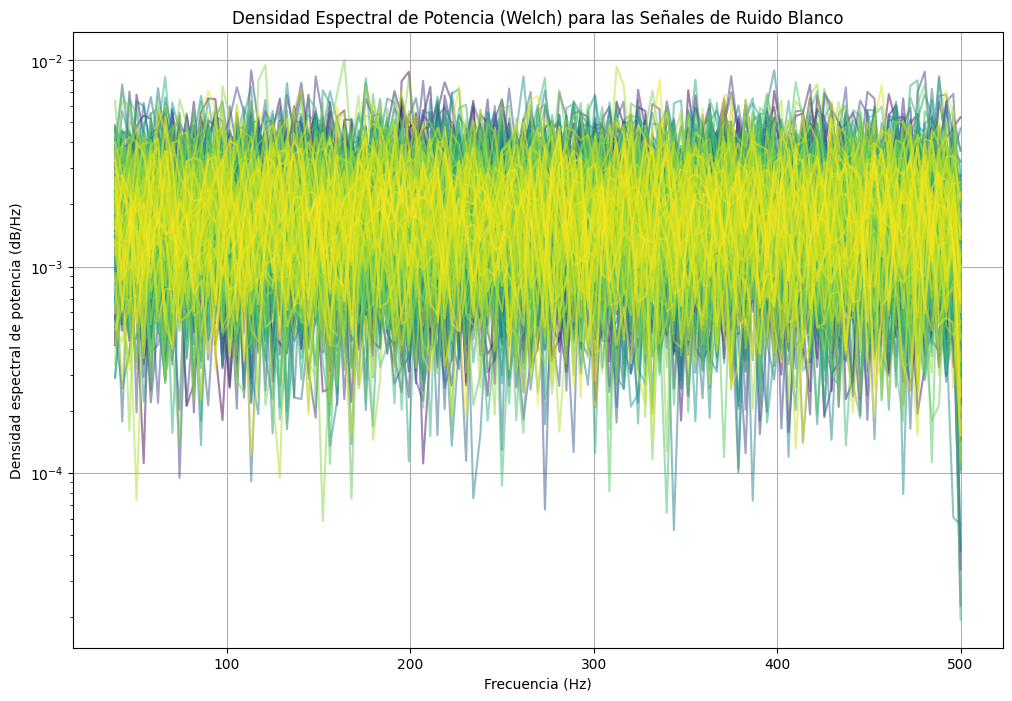

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch
import matplotlib.cm as cm

# Parámetros
num_signals = 250  # Número de señales de ruido
signal_length = 512  # Longitud de cada señal
fs = 1000  # Frecuencia de muestreo en Hz

# Crear un solo vector n con 256 señales de ruido blanco (cada señal de 512 muestras)
n = np.random.normal(0, 1, (num_signals, signal_length))  # Ruido blanco

# Crear un mapa de colores
colors = cm.viridis(np.linspace(0, 1, num_signals))  # Utiliza una gama de colores

# Graficar la densidad espectral de potencia (PSD) estimada por Welch
plt.figure(figsize=(12, 8))

for i in range(num_signals):
    f, Pxx = welch(n[i], fs, nperseg=256)  # Aplicar el método de Welch para cada señal
    plt.semilogy(f[10:240], Pxx[10:240], color=colors[i], alpha=0.5)  # Usamos `semilogy` para escala logarítmica en Y

plt.title("Densidad Espectral de Potencia (Welch) para las Señales de Ruido Blanco")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Densidad espectral de potencia (dB/Hz)")
plt.grid(True)
plt.show()


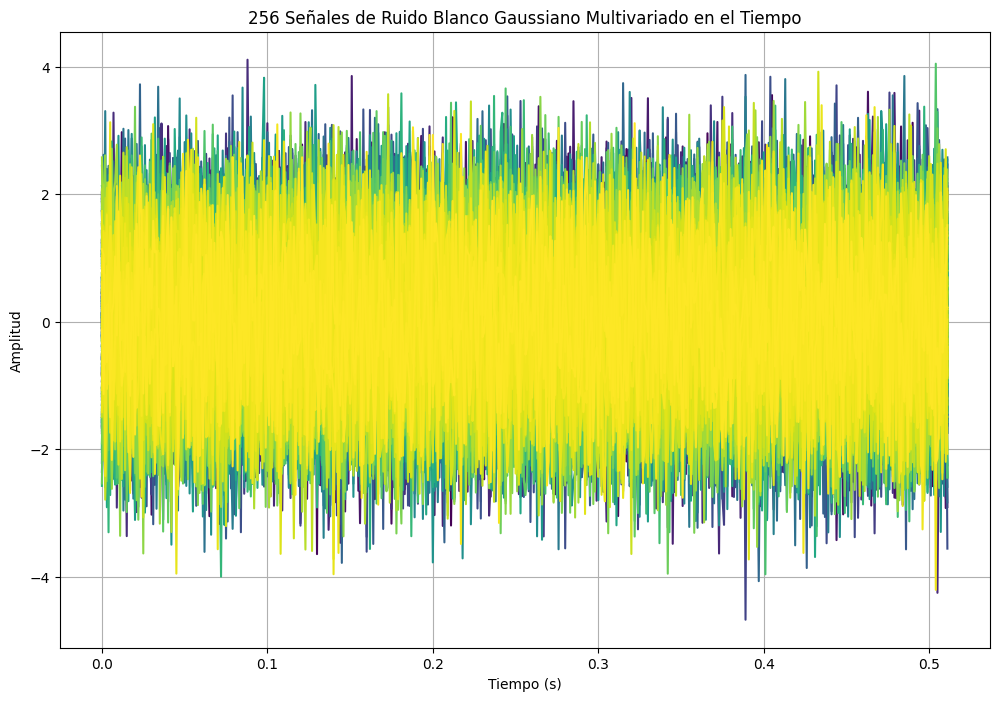

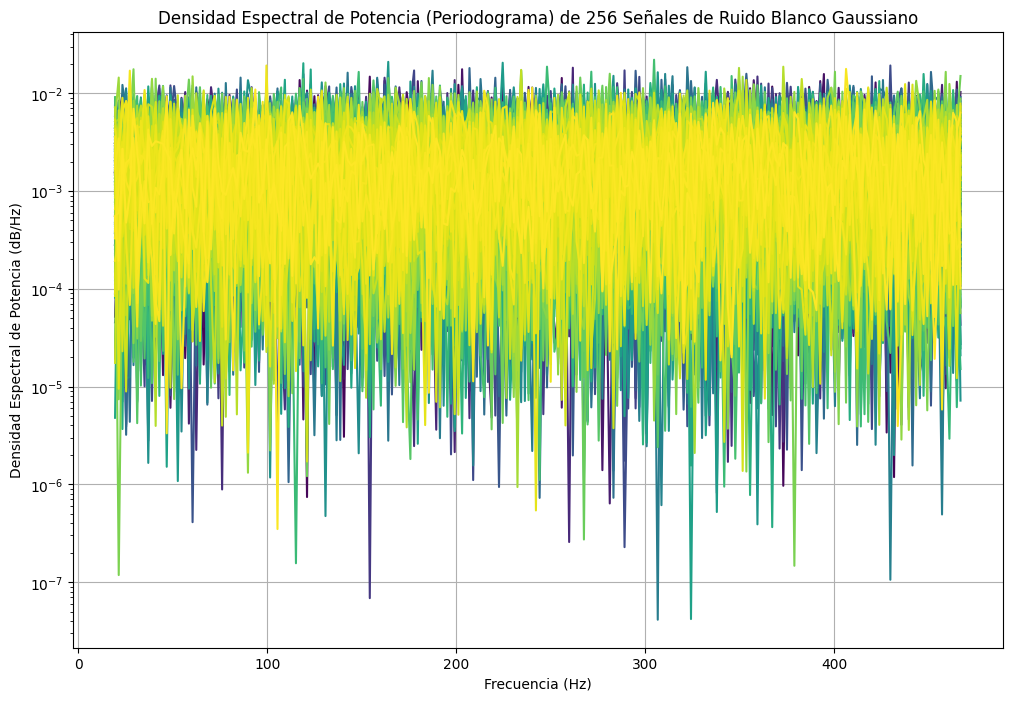

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.signal import periodogram

# Parámetros
num_signals = 256  # Número de señales de ruido
signal_length = 512  # Longitud de cada señal
fs = 1000  # Frecuencia de muestreo en Hz

# Crear un vector de tiempo t de longitud 512
t = np.arange(signal_length) / fs  # Esto crea un vector t de longitud 512

# Generar 256 señales de ruido blanco gaussiano diferentes
signals = np.random.normal(0, 1, (num_signals, signal_length))  # 256 señales de ruido

# Crear un mapa de colores
colors = cm.viridis(np.linspace(0, 1, num_signals))  # Utiliza una gama de colores

# Graficar las 256 señales en el tiempo, cada una con un color diferente
plt.figure(figsize=(12, 8))
for i in range(num_signals):
    plt.plot(t, signals[i], color=colors[i])  # Cada señal tiene un color diferente

plt.title("256 Señales de Ruido Blanco Gaussiano Multivariado en el Tiempo")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()

# Aplicar el método de Periodograma para calcular la densidad espectral de potencia (PSD)
plt.figure(figsize=(12, 8))

for i in range(num_signals):
    f, Pxx = periodogram(signals[i], fs)  # Calcular el periodograma
    plt.semilogy(f[10:240], Pxx[10:240], color=colors[i])  # Graficar el periodograma en escala logarítmica

plt.title("Densidad Espectral de Potencia (Periodograma) de 256 Señales de Ruido Blanco Gaussiano")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Densidad Espectral de Potencia (dB/Hz)")
plt.grid(True)
plt.show()
